In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


In [18]:
#creating the data
sample_size = 100
tenior = abs(np.random.normal(50, 35, sample_size)).astype(int)
random_vector_A = np.random.binomial(1, .75, sample_size)
feature_A = abs(np.random.normal(100, 35, sample_size)*random_vector_A + np.random.normal(500, 50, sample_size)*(1-random_vector_A)).astype(int)
random_vector_B = np.random.binomial(1, .6, sample_size)
feature_B = abs(np.random.normal(80, 35, sample_size)*random_vector_B + np.random.normal(100, 10, sample_size)*(1-random_vector_B)).astype(int)
random_vector_C = np.random.binomial(1, .6, sample_size)
feature_C = abs(np.random.normal(120, 20, sample_size)*random_vector_C + np.random.normal(54, 5, sample_size)*(1-random_vector_C)).astype(int)
random_vector_D = np.random.binomial(1, .5, sample_size)
feature_D = abs(np.random.normal(40, 10, sample_size)*random_vector_D + np.random.normal(100, 15, sample_size)*(1-random_vector_D)).astype(int)


In [19]:
dataframe = pd.DataFrame({'Tenior':tenior, 'F_A':feature_A,'F_B':feature_B,'F_C':feature_C,'F_D':feature_D})

In [20]:
dataframe

,Tenior,F_A,F_B,F_C,F_D
0,106,456,50,66,89
1,28,92,112,95,34
2,31,427,66,121,62
3,12,89,88,140,35
4,80,123,61,56,46
...,...,...,...,...,...
95,52,74,54,122,44
96,37,501,89,116,103
97,51,154,115,138,43
98,28,126,89,111,113


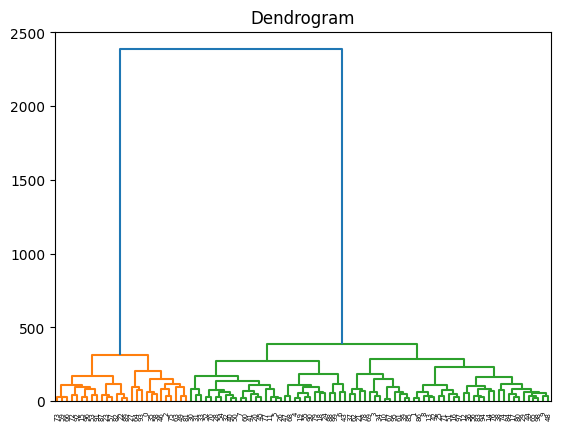

In [21]:
Z = sch.linkage(dataframe, 'ward')

plt.figure()
plt.title('Dendrogram')
sch.dendrogram(Z)
plt.show()


In [22]:
labels = sch.fcluster(Z, 3, criterion='maxclust')
data_clustered = dataframe.copy()
data_clustered['cluster']=labels

In [23]:
data_clustered.groupby('cluster').agg('mean')

,Tenior,F_A,F_B,F_C,F_D
cluster,,,,,
1,55.666667,481.296296,86.703704,91.074074,75.148148
2,52.937500,95.375000,83.593750,61.468750,64.218750
3,51.487805,106.292683,92.268293,124.073171,70.682927


(array([27., 32., 41.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <BarContainer object of 3 artists>)

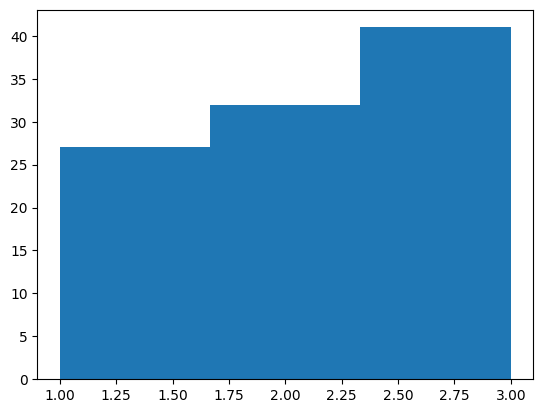

In [24]:
plt.hist(labels, bins=3)

In [27]:
#using plotly
import plotly.figure_factory as ff

np.random.seed(1)

fig = ff.create_dendrogram(dataframe, color_threshold = 200)
fig.update_layout(width=1000, height=500)
fig.show()

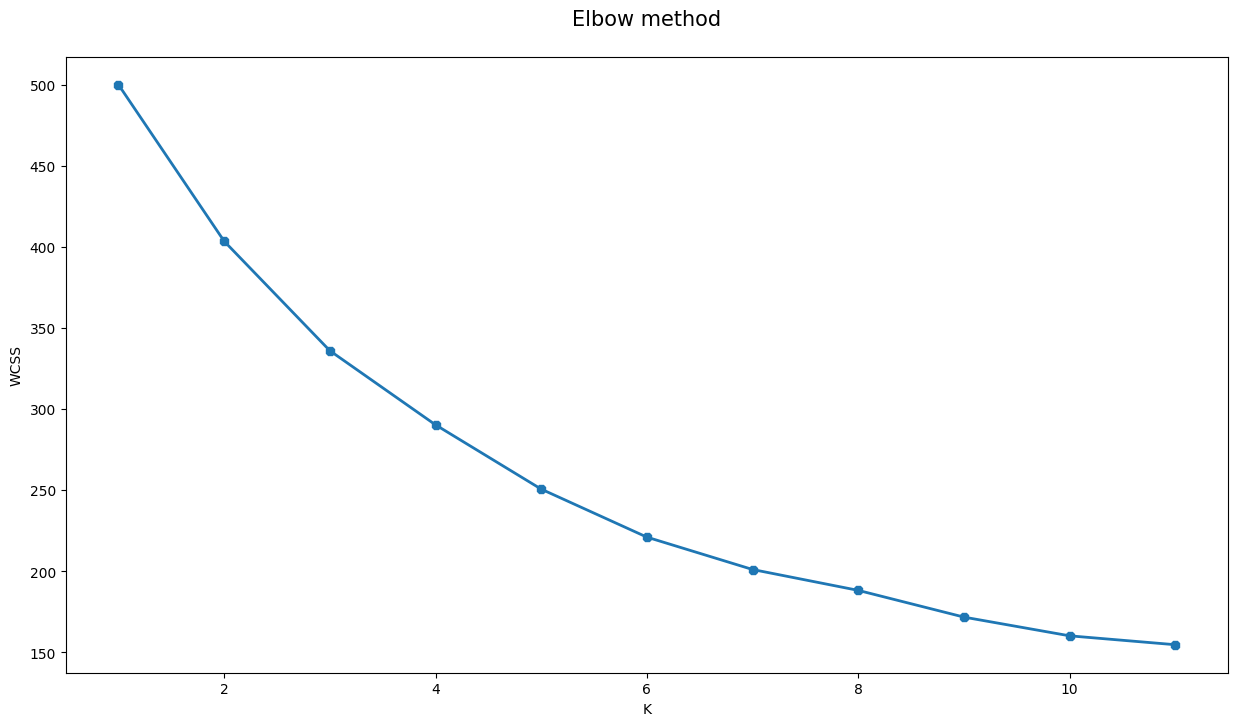

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit(dataframe)
dataframe_n = scaler.transform(dataframe)

wcss = []

for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++', n_init = 10, random_state=0)
    k_means.fit(dataframe_n)
    wcss.append(k_means.inertia_)


plt.figure(figsize=(15,8))

plt.plot(range(1, 12), wcss, linewidth=2, marker='8')
plt.title('Elbow method\n', fontsize=15)
plt.xlabel('K')
plt.ylabel('WCSS')
ax = plt.gca() # get axis handle
line = ax.get_lines()[0]
xydata = line.get_xydata()
plt.show()

Text(0, 0.5, 'Feature C')

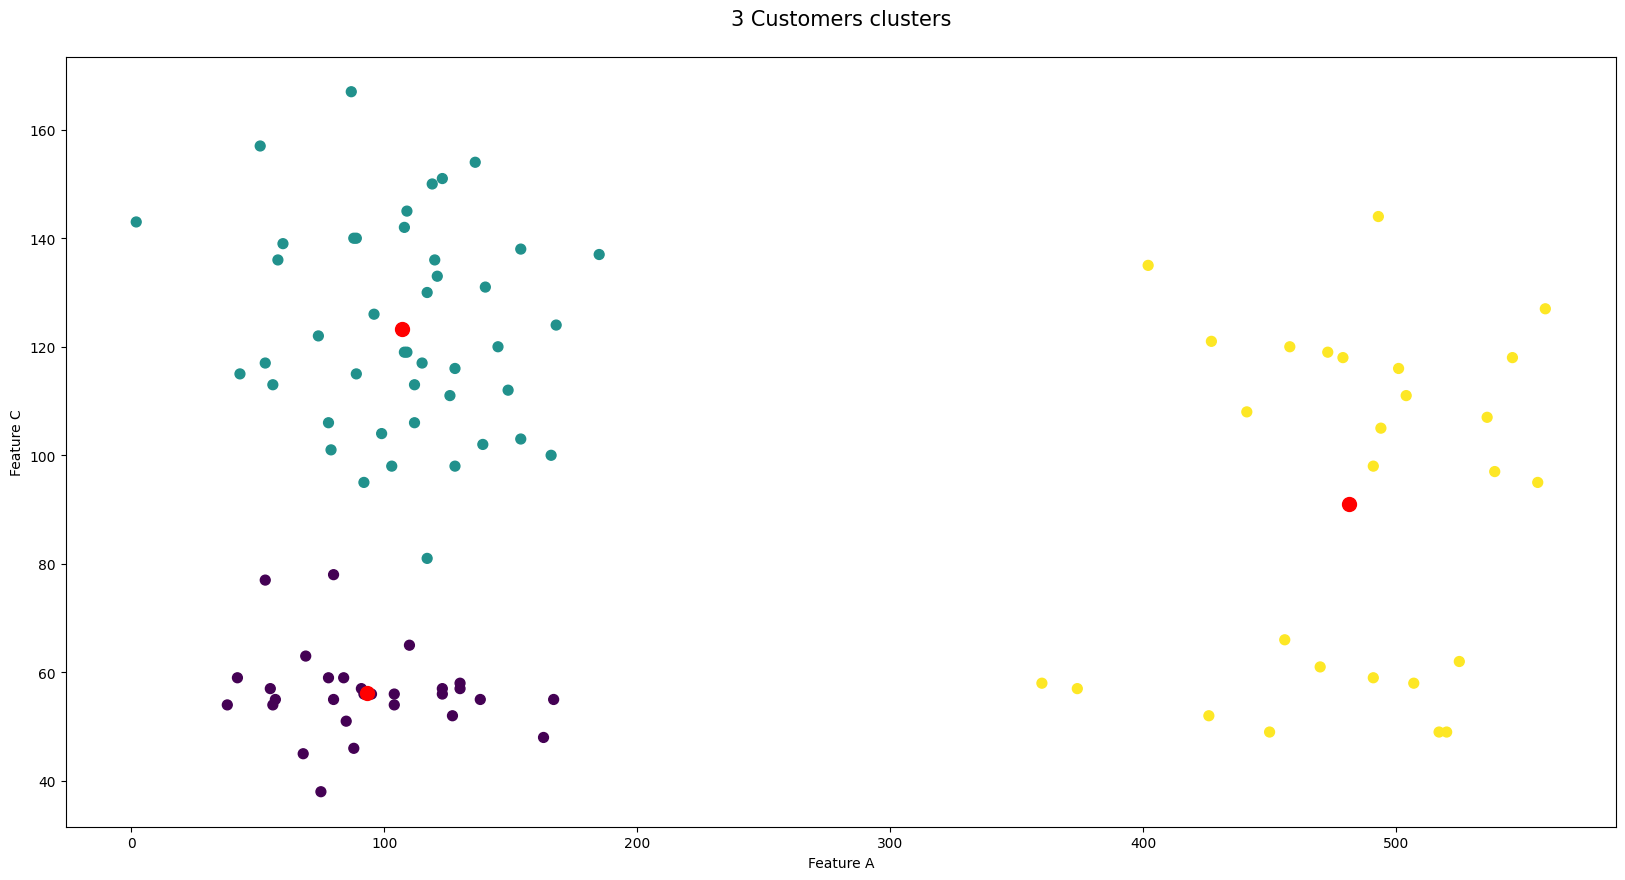

In [29]:
plt.figure(figsize = (20, 10))
n_c = 3

k_means=KMeans(n_clusters=n_c, n_init=10).fit(dataframe_n)

plt.scatter(dataframe['F_A'], dataframe['F_C'], c = k_means.labels_, s = 50)
plt.scatter(scaler.inverse_transform(k_means.cluster_centers_)[:, 1],scaler.inverse_transform(k_means.cluster_centers_)[:, 3], color = 'red', s = 100)
plt.title('{} Customers clusters\n'.format(n_c), fontsize = 15)
plt.xlabel('Feature A')
plt.ylabel('Feature C')

Text(0, 0.5, 'Feature C')

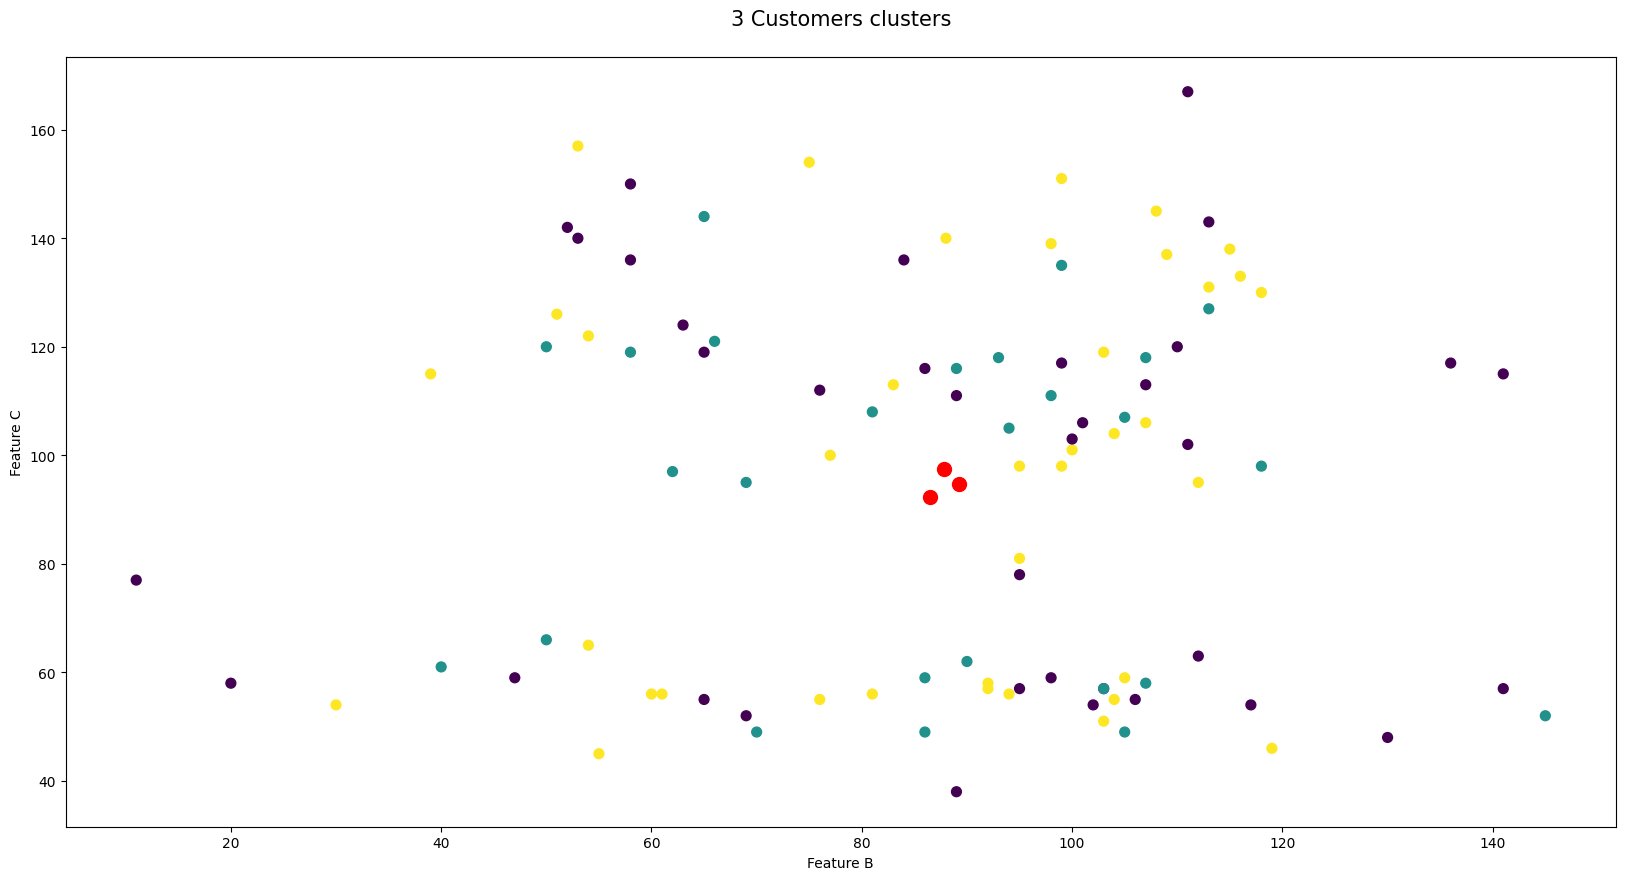

In [30]:
plt.figure(figsize = (20, 10))

k_means=KMeans(n_clusters=n_c, n_init=10).fit(dataframe_n)

plt.scatter(dataframe['F_B'], dataframe['F_C'], c = k_means.labels_, s = 50)
plt.scatter(scaler.inverse_transform(k_means.cluster_centers_)[:, 2],scaler.inverse_transform(k_means.cluster_centers_)[:, 3], color = 'red', s = 100)
plt.title('{} Customers clusters\n'.format(n_c), fontsize = 15)
plt.xlabel('Feature B')
plt.ylabel('Feature C')

Text(0, 0.5, 'Feature D')

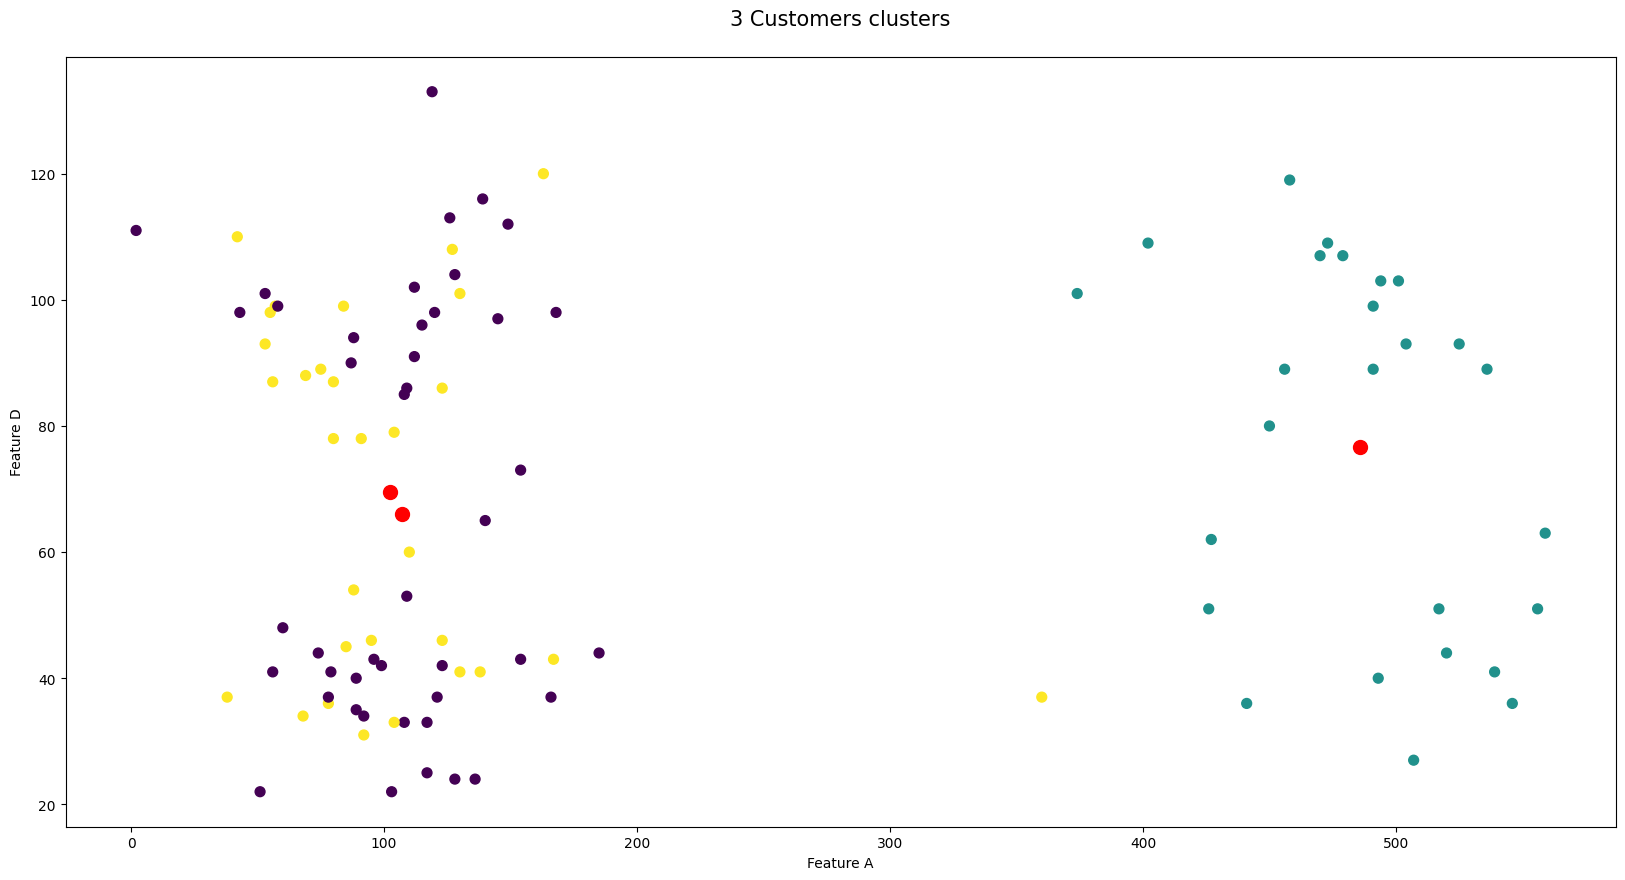

In [31]:
plt.figure(figsize = (20, 10))

k_means=KMeans(n_clusters=n_c, n_init=10).fit(dataframe_n)

plt.scatter(dataframe['F_A'], dataframe['F_D'], c = k_means.labels_, s = 50)
plt.scatter(scaler.inverse_transform(k_means.cluster_centers_)[:, 1],scaler.inverse_transform(k_means.cluster_centers_)[:, 4], color = 'red', s = 100)
plt.title('{} Customers clusters\n'.format(n_c), fontsize = 15)
plt.xlabel('Feature A')
plt.ylabel('Feature D')

Text(0, 0.5, 'Tenior')

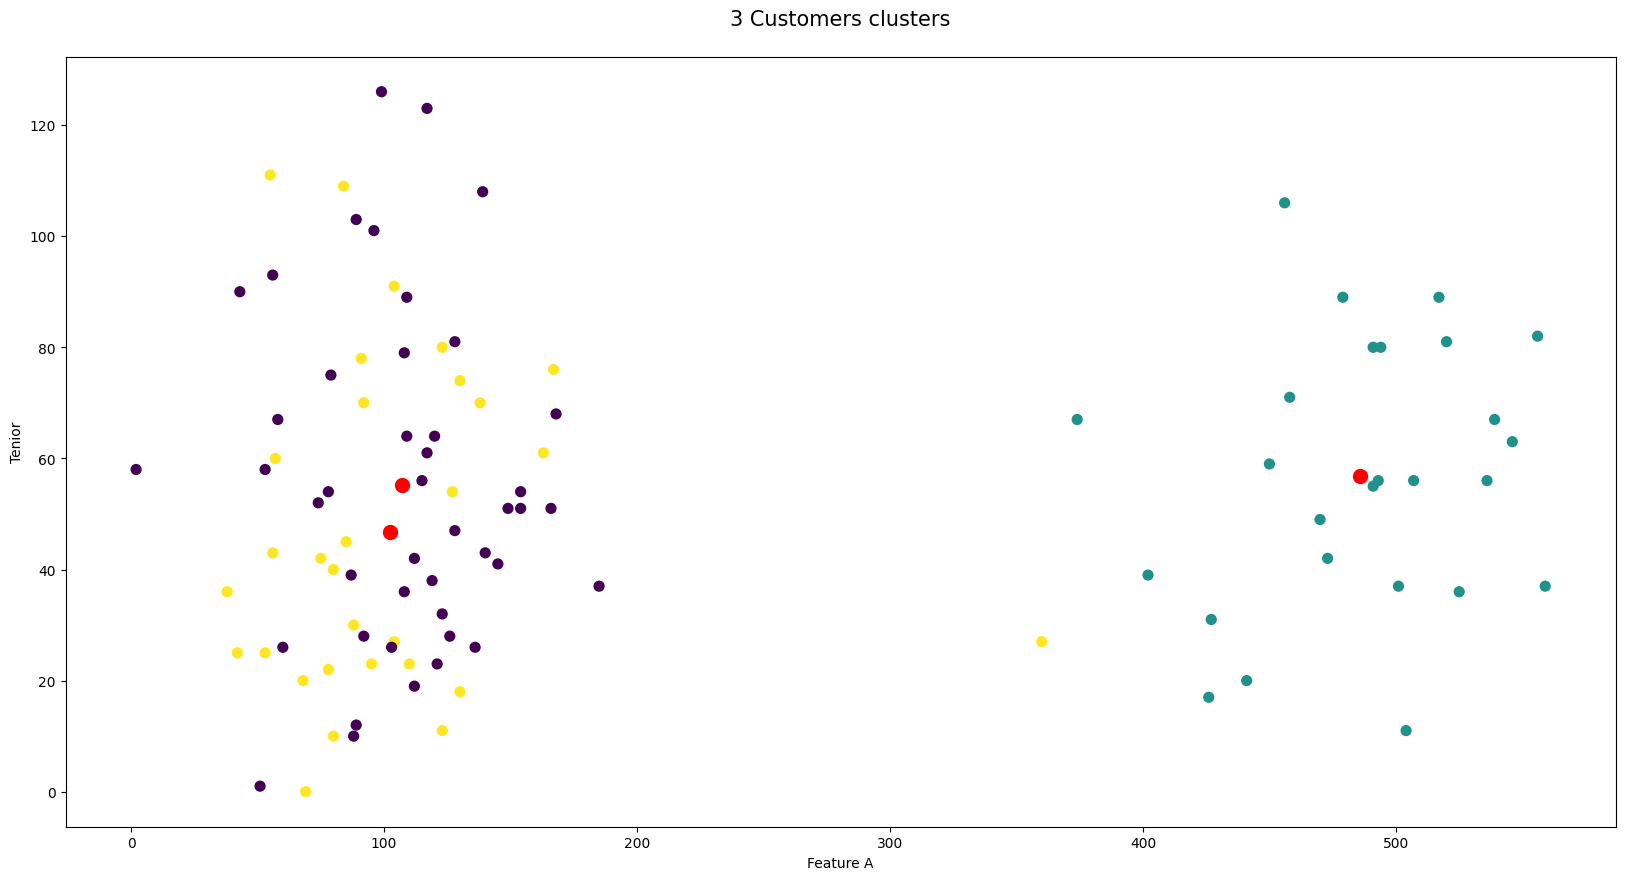

In [32]:
plt.figure(figsize = (20, 10))

k_means=KMeans(n_clusters=n_c, n_init=10).fit(dataframe_n)

plt.scatter(dataframe['F_A'], dataframe['Tenior'], c = k_means.labels_, s = 50)
plt.scatter(scaler.inverse_transform(k_means.cluster_centers_)[:, 1],scaler.inverse_transform(k_means.cluster_centers_)[:, 0], color = 'red', s = 100)
plt.title('{} Customers clusters\n'.format(n_c), fontsize = 15)
plt.xlabel('Feature A')
plt.ylabel('Tenior')